#Twitter Geolocation Prediction using Naïve Bayes

In [2]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import csv
import os
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Reading the Dataset

In [3]:
#read the path
file_path = "data.csv"

df = pd.read_csv(file_path)

In [4]:
df.head()

,user_id,created_at,tweet_id,text,country
0,1.294095e+18,2022-11-22T22:13:48.000Z,1.595179e+18,RT @JonnyCaplan: Creative Entrepreneur of the ...,USA
1,1.294095e+18,2022-11-22T20:33:39.000Z,1.595154e+18,RT @JoseMarky_200: @shirtsthtgohard Available ...,USA
2,1.294095e+18,2022-11-22T19:14:08.000Z,1.595134e+18,RT @moyo_world: We're moving our manufacturing...,USA
3,1.294095e+18,2022-11-22T16:56:17.000Z,1.595099e+18,RT @winwinbank: 🏆Dünya Kupasında Da Güvenin Ad...,USA
4,1.294095e+18,2022-11-22T15:05:37.000Z,1.595071e+18,RT @UtilityNet_: The Rules for the First Test ...,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     127333 non-null  float64
 1   created_at  127333 non-null  object 
 2   tweet_id    127333 non-null  float64
 3   text        127333 non-null  object 
 4   country     127333 non-null  object 
dtypes: float64(2), object(3)
memory usage: 4.9+ MB


Converting created_at from type object to pandas datetime format.

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   user_id     127333 non-null  float64            
 1   created_at  127333 non-null  datetime64[ns, UTC]
 2   tweet_id    127333 non-null  float64            
 3   text        127333 non-null  object             
 4   country     127333 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 4.9+ MB


Visualising Tweets Count Per Country

In [7]:
tweets_per_country = df['country'].value_counts().loc[lambda x : x > 100].reset_index(name='counts')

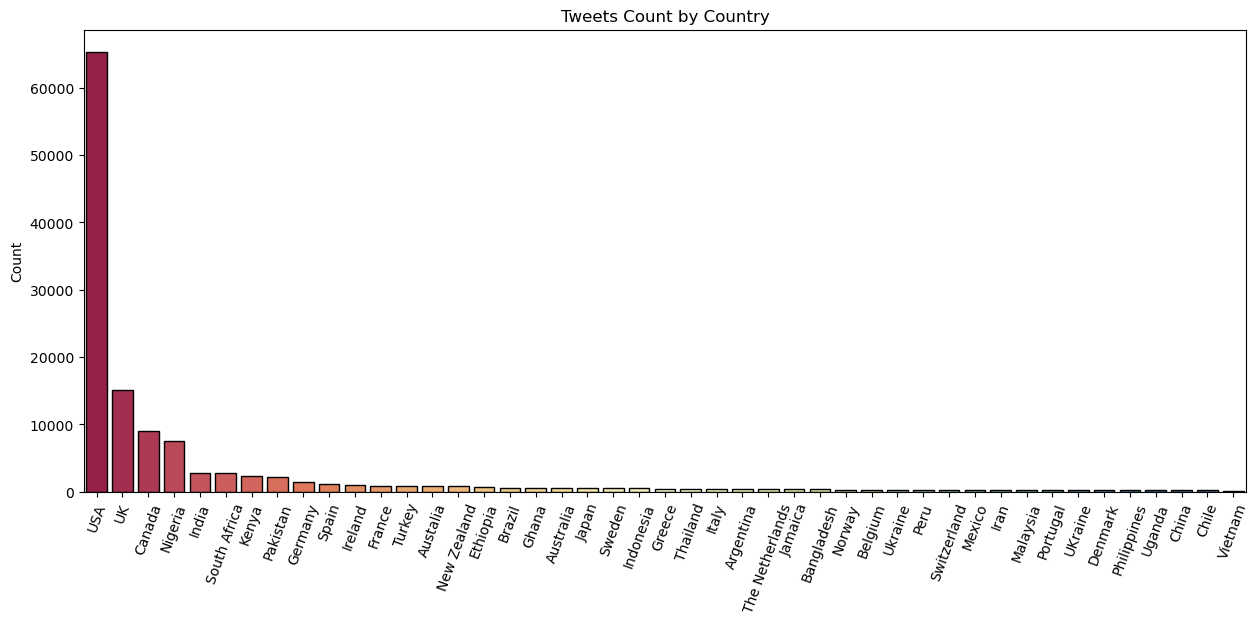

In [11]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black', palette='Spectral')
plt.title('Tweets Count by Country')
plt.xticks(rotation=70)
plt.yticks()
plt.ylabel('Count')
plt.xlabel('')
plt.show()

We can see that USA significantly dominates all the other countries by Tweet counts.

## Preprocessing the Dataset

Due to an on-going World-Cup Event, I will not use **City/Country Names (CC)** as suggested in the paper. This is due to an overuse of many Country names to describe certain games.

**Location IndicativeWords (LIW)** won't be used either due to the lack of clarification.

###Creating #Hashtags (HASH) DataFrame

In [12]:
dfHASH = df.copy()

In [13]:
pattern = r'#\S+'

search = []    
for values in dfHASH['text']:
  hash = re.findall(pattern, values)
  search.append(hash)

dfHASH['hashtag'] = search

In [14]:
dfHASH.head()

,user_id,created_at,tweet_id,text,country,hashtag
0,1.294095e+18,2022-11-22 22:13:48+00:00,1.595179e+18,RT @JonnyCaplan: Creative Entrepreneur of the ...,USA,[]
1,1.294095e+18,2022-11-22 20:33:39+00:00,1.595154e+18,RT @JoseMarky_200: @shirtsthtgohard Available ...,USA,[]
2,1.294095e+18,2022-11-22 19:14:08+00:00,1.595134e+18,RT @moyo_world: We're moving our manufacturing...,USA,"[#Shenzhen, #ele…]"
3,1.294095e+18,2022-11-22 16:56:17+00:00,1.595099e+18,RT @winwinbank: 🏆Dünya Kupasında Da Güvenin Ad...,USA,"[#Marsbahis, #MarsBet]"
4,1.294095e+18,2022-11-22 15:05:37+00:00,1.595071e+18,RT @UtilityNet_: The Rules for the First Test ...,USA,"[#utility, #utilitynet, #BigData, #Analytics, ..."


In [15]:
dfHASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   user_id     127333 non-null  float64            
 1   created_at  127333 non-null  datetime64[ns, UTC]
 2   tweet_id    127333 non-null  float64            
 3   text        127333 non-null  object             
 4   country     127333 non-null  object             
 5   hashtag     127333 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 5.8+ MB


In [16]:
print("Number of Rows: " + str(len(dfHASH.index)))

Number of Rows: 127333


In [17]:
dfHASH = dfHASH.drop(columns=['user_id', 'created_at', 'tweet_id', 'text'])

In [18]:
dfHASH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   country  127333 non-null  object
 1   hashtag  127333 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [19]:
dfHASH = dfHASH[dfHASH['hashtag'].map(lambda x: len(x)) > 0]

In [20]:
print("Number of Rows: " + str(len(dfHASH.index)))

Number of Rows: 20129


In [21]:
dfHASH.head()

,country,hashtag
2,USA,"[#Shenzhen, #ele…]"
3,USA,"[#Marsbahis, #MarsBet]"
4,USA,"[#utility, #utilitynet, #BigData, #Analytics, ..."
6,USA,"[#塔卡尔世界杯, #世界杯冠军预测, #足球, #开云, #真人百家乐]"
7,USA,"[#塔卡尔世界杯, #世界杯冠军预测, #足球, #开云, #真人百家乐]"


Separate Each hashtag into a its own row

In [22]:
dfHASH = dfHASH.explode('hashtag')

In [23]:
dfHASH.head()

,country,hashtag
2,USA,#Shenzhen
2,USA,#ele…
3,USA,#Marsbahis
3,USA,#MarsBet
4,USA,#utility


###Creating @Mentions (MENT) DataFrame

In [24]:
dfMENT = df.copy()

In [25]:
pattern = r'@[^:\s]+'

search = []    
for values in dfMENT['text']:
  ment = re.findall(pattern, values)
  search.append(ment)

dfMENT['mention'] = search

In [26]:
dfMENT.head()

,user_id,created_at,tweet_id,text,country,mention
0,1.294095e+18,2022-11-22 22:13:48+00:00,1.595179e+18,RT @JonnyCaplan: Creative Entrepreneur of the ...,USA,"[@JonnyCaplan, @The]"
1,1.294095e+18,2022-11-22 20:33:39+00:00,1.595154e+18,RT @JoseMarky_200: @shirtsthtgohard Available ...,USA,"[@JoseMarky_200, @shirtsthtgohard]"
2,1.294095e+18,2022-11-22 19:14:08+00:00,1.595134e+18,RT @moyo_world: We're moving our manufacturing...,USA,[@moyo_world]
3,1.294095e+18,2022-11-22 16:56:17+00:00,1.595099e+18,RT @winwinbank: 🏆Dünya Kupasında Da Güvenin Ad...,USA,[@winwinbank]
4,1.294095e+18,2022-11-22 15:05:37+00:00,1.595071e+18,RT @UtilityNet_: The Rules for the First Test ...,USA,[@UtilityNet_]


In [27]:
dfMENT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   user_id     127333 non-null  float64            
 1   created_at  127333 non-null  datetime64[ns, UTC]
 2   tweet_id    127333 non-null  float64            
 3   text        127333 non-null  object             
 4   country     127333 non-null  object             
 5   mention     127333 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 5.8+ MB


In [28]:
print("Number of Rows: " + str(len(dfMENT.index)))

Number of Rows: 127333


In [29]:
dfMENT = dfMENT.drop(columns=['user_id', 'created_at', 'tweet_id', 'text'])

In [30]:
dfMENT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127333 entries, 0 to 127332
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   country  127333 non-null  object
 1   mention  127333 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [31]:
dfMENT = dfMENT[dfMENT['mention'].map(lambda x: len(x)) > 0]

In [32]:
print("Number of Rows: " + str(len(dfMENT.index)))

Number of Rows: 101771


In [33]:
dfMENT.head()

,country,mention
0,USA,"[@JonnyCaplan, @The]"
1,USA,"[@JoseMarky_200, @shirtsthtgohard]"
2,USA,[@moyo_world]
3,USA,[@winwinbank]
4,USA,[@UtilityNet_]


In [34]:
dfMENT = dfMENT.explode('mention')

In [35]:
dfMENT.head()

,country,mention
0,USA,@JonnyCaplan
0,USA,@The
1,USA,@JoseMarky_200
1,USA,@shirtsthtgohard
2,USA,@moyo_world
